# Solution Part:
- Data Understanding
- Data Exploration
- Data Cleaning
- Data Preparation/Feature Engineering
- Model Building
- Model Evaluation

In [1]:
#Import all the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the dataset
cars = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
cars.shape

(205, 26)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
cars['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [8]:
cars['symboling'].astype('category').value_counts()

symboling
0     67
1     54
2     32
3     27
-1    22
-2     3
Name: count, dtype: int64

In [9]:
cars['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [10]:
cars['aspiration'].astype('category').value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [11]:
cars['carbody'].astype('category').value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [12]:
cars['drivewheel'].astype('category').value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

<Axes: xlabel='wheelbase', ylabel='Density'>

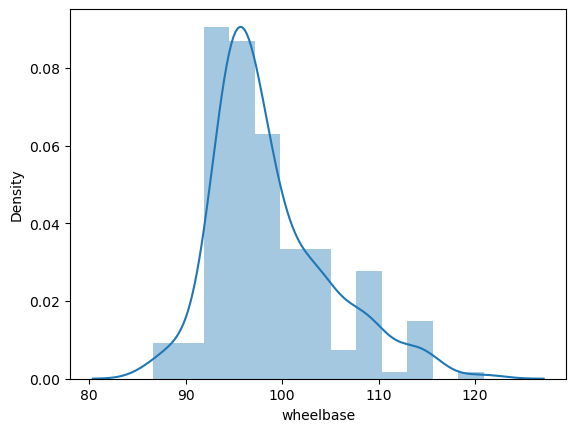

In [13]:
sns.distplot(cars['wheelbase'])

In [14]:
cars[cars['drivewheel']=='fwd']['wheelbase'].mean()

96.42916666666666

In [15]:
cars[cars['drivewheel']=='rwd']['wheelbase'].mean()

102.66052631578948

In [16]:
cars[cars['drivewheel']=='4wd']['wheelbase'].mean()

96.82222222222224

<Axes: xlabel='curbweight', ylabel='Density'>

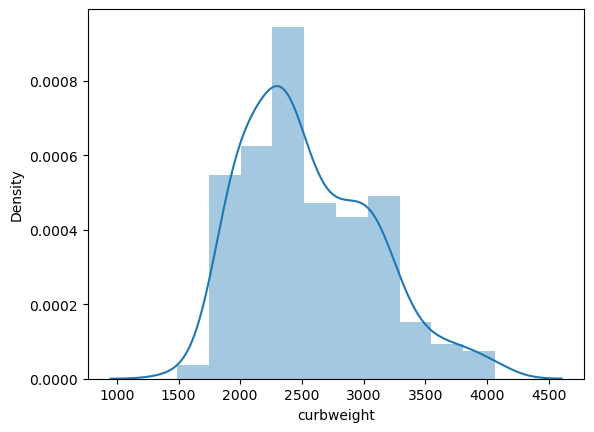

In [17]:
sns.distplot(cars['curbweight'])

In [18]:
cars['enginetype'].astype('category').value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='Density'>

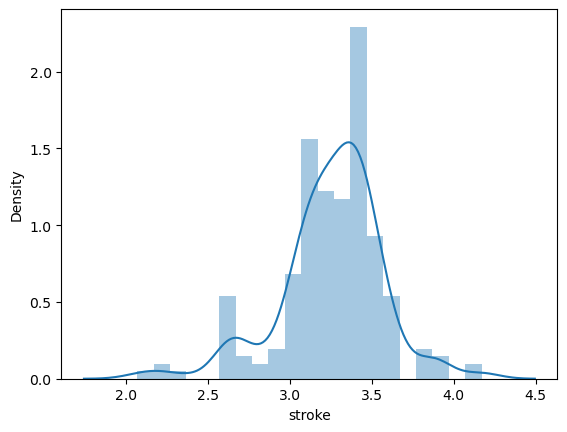

In [19]:
sns.distplot(cars['stroke'])

<Axes: xlabel='compressionratio', ylabel='Density'>

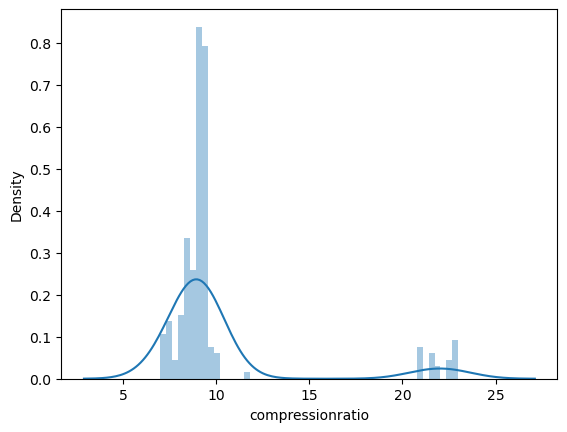

In [20]:
sns.distplot(cars['compressionratio'])

<Axes: xlabel='horsepower', ylabel='Density'>

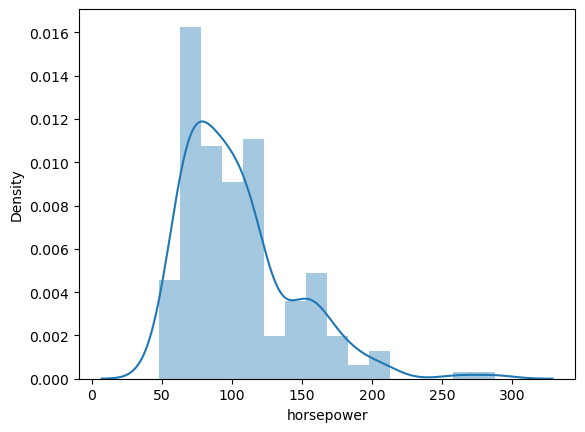

In [21]:
sns.distplot(cars['horsepower'])

<Axes: xlabel='price', ylabel='Density'>

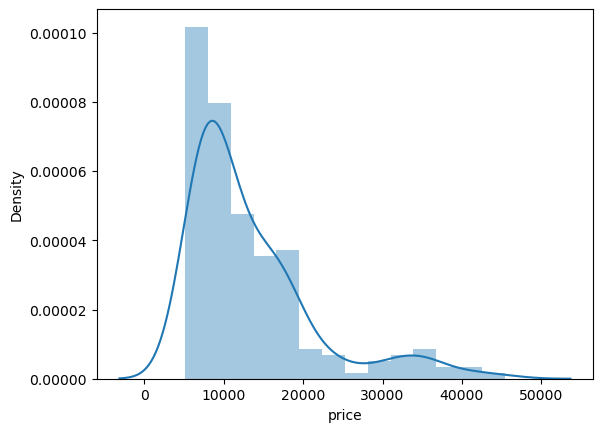

In [22]:
sns.distplot(cars['price'])

## Data Exploration

In [23]:
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [25]:
cars_numeric = cars_numeric.drop(['car_ID'], axis=1)
cars_numeric.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 2000x1000 with 0 Axes>

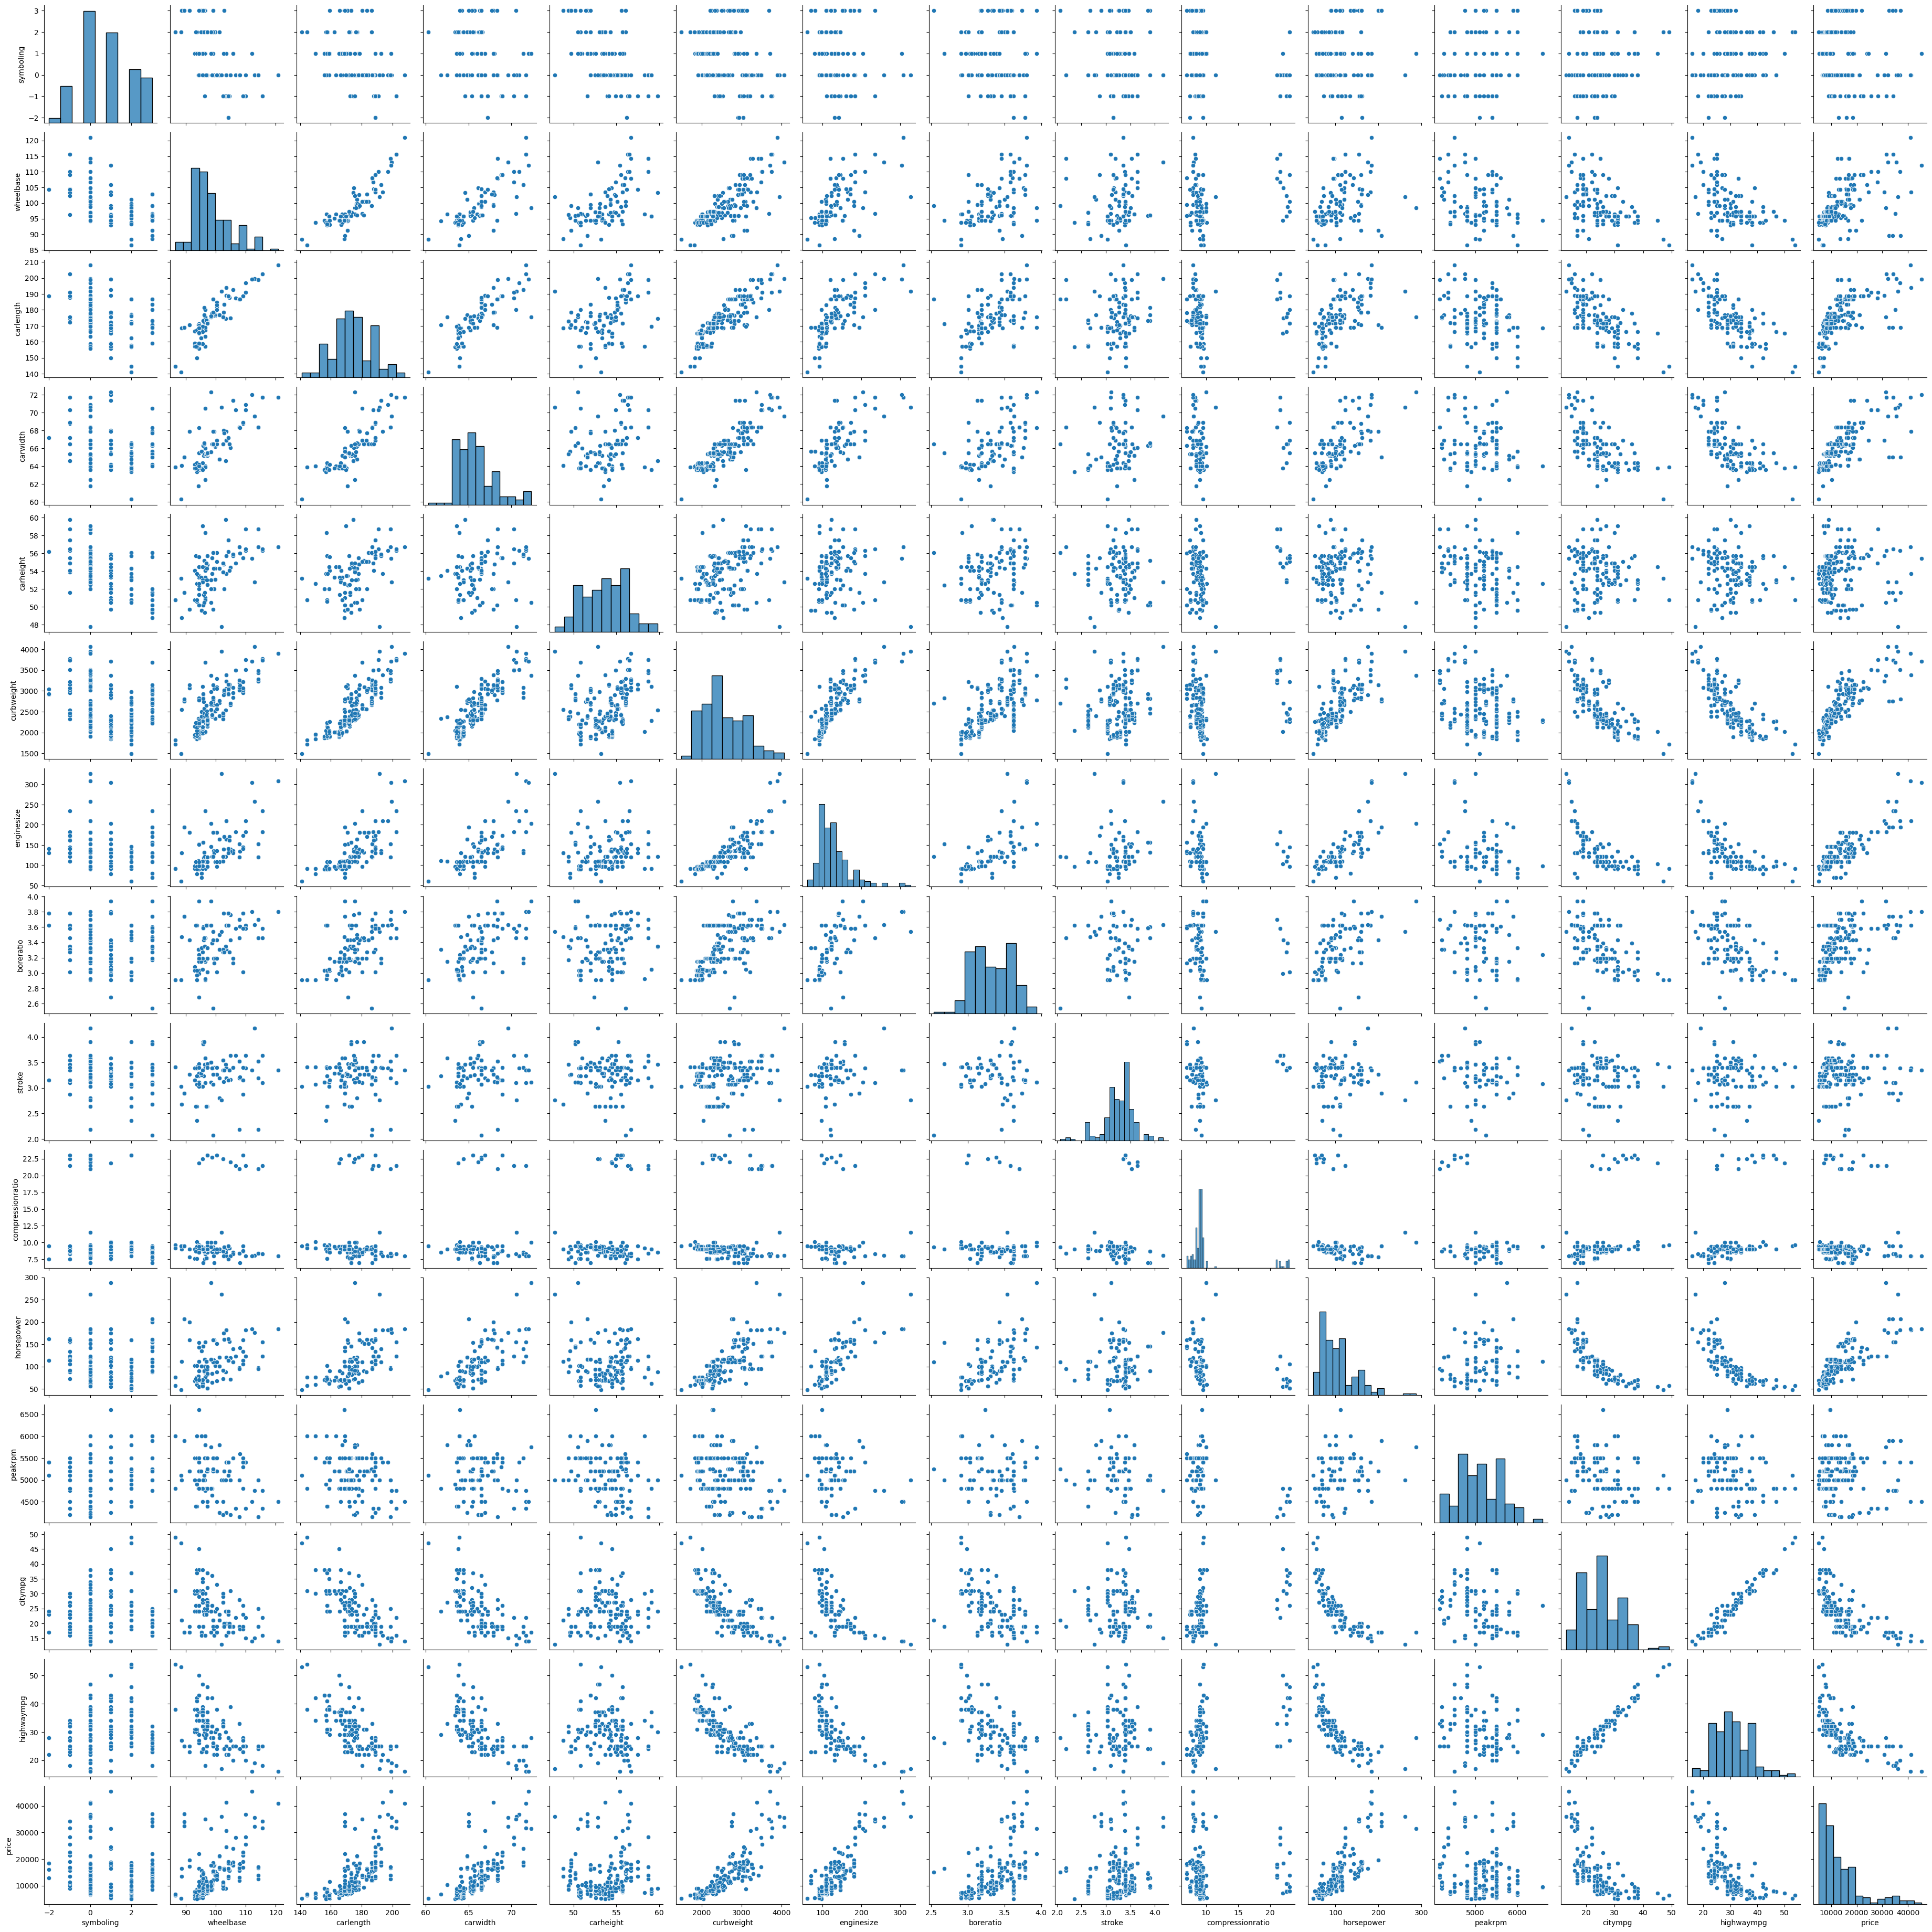

In [26]:
#Pairwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)
plt.show()

In [27]:
#Correlation plot
cor = cars_numeric.corr()
cor

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


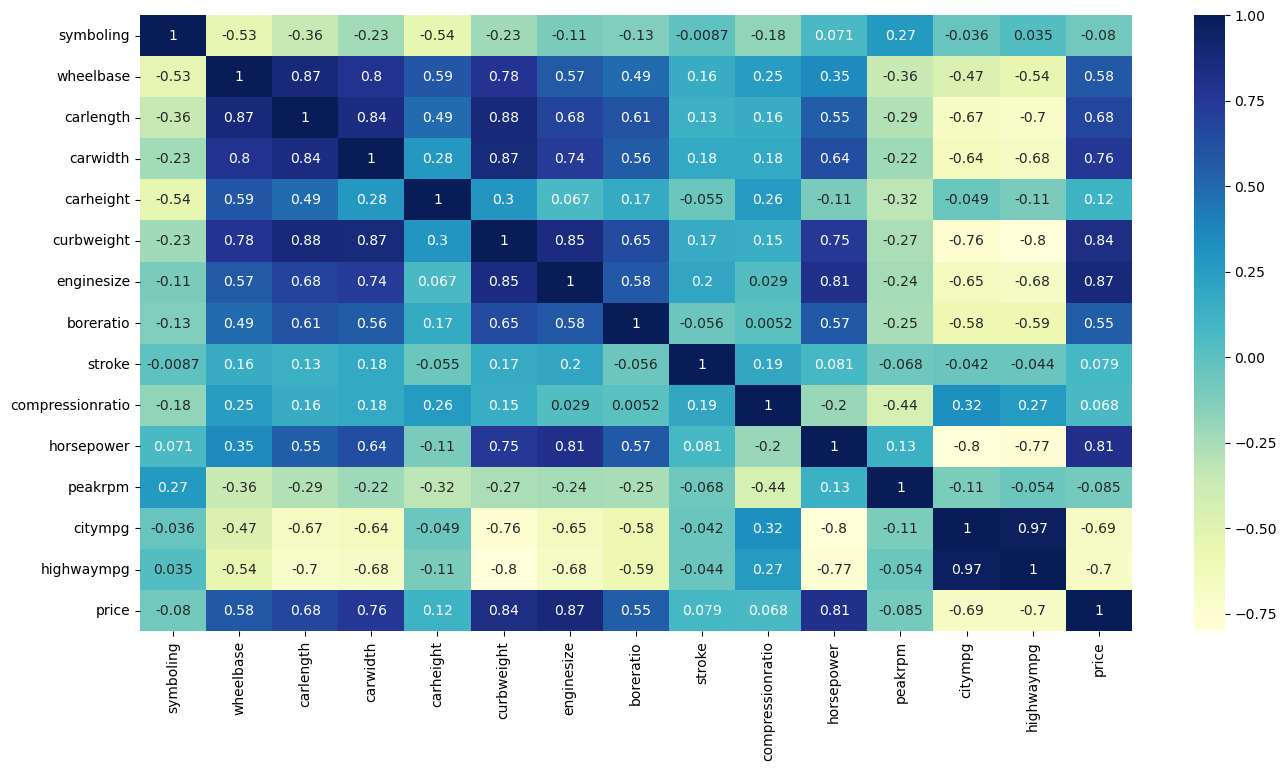

In [28]:
plt.figure(figsize=(16,8))
sns.heatmap(cor, cmap='YlGnBu', annot=True)
plt.show()

## Data Cleaning

In [29]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [31]:
cars['CarName'][:20]

0           alfa-romero giulia
1          alfa-romero stelvio
2     alfa-romero Quadrifoglio
3                  audi 100 ls
4                   audi 100ls
5                     audi fox
6                   audi 100ls
7                    audi 5000
8                    audi 4000
9          audi 5000s (diesel)
10                    bmw 320i
11                    bmw 320i
12                      bmw x1
13                      bmw x3
14                      bmw z4
15                      bmw x4
16                      bmw x5
17                      bmw x3
18            chevrolet impala
19       chevrolet monte carlo
Name: CarName, dtype: object

In [32]:
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:20]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
Name: CarName, dtype: object

In [33]:
import re

In [34]:
p = re.compile(r'\w+-?\w+')
carnames = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
carnames

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [36]:
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p, x)[0])

In [37]:
cars['car_company'].astype('category').value_counts()

car_company
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: count, dtype: int64

In [40]:
#Replace misspelled car_company names

#Volkswagen
cars.loc[(cars['car_company']=='vw') | (cars['car_company']=='vokswagen'), 'car_company'] = 'volkswagen'

#Porsche
cars.loc[(cars['car_company']=='porcshce'), 'car_company'] = 'porsche'

#Toyota
cars.loc[(cars['car_company']=='toyouta'), 'car_company'] = 'toyota'

#Nissan
cars.loc[(cars['car_company']=='Nissan'), 'car_company'] = 'nissan'

#Mazda
cars.loc[(cars['car_company']=='maxda'), 'car_company'] = 'mazda'

In [41]:
cars['car_company'].astype('category').value_counts()

car_company
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [42]:
cars = cars.drop('CarName', axis=1)

In [43]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [44]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data Preparation

In [51]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [52]:
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [53]:
cars['cylindernumber'].astype('category').value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [54]:
cars['doornumber'].astype('category').value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [55]:
def num_map(x):
    return x.map({'two':2, "three":3, "four":4, "five":5, "six":6, "eight":8, "twelve":12})

In [56]:
cars[['doornumber', 'cylindernumber']] = cars[['doornumber', 'cylindernumber']].apply(num_map)

In [57]:
cars['doornumber'].astype('category').value_counts()

doornumber
4    115
2     90
Name: count, dtype: int64

In [58]:
cars['cylindernumber'].astype('category').value_counts()

cylindernumber
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: count, dtype: int64

In [59]:
#Subset all categorical variables
cars_categorical = cars.select_dtypes(include=['object'])
cars_categorical.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [60]:
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
cars = cars.drop(list(cars_categorical.columns), axis=1)

In [63]:
#Concat dummy variables
cars = pd.concat([cars, cars_dummies], axis=1)

In [64]:
cars.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
cars.drop('car_ID', axis=1, inplace=True)

## Model Building & Evaluation

In [67]:
from sklearn.model_selection import train_test_split

In [75]:
from sklearn.linear_model import LinearRegression

In [68]:
#Split the dataset
df_ytrain, df_test = train_test_split(cars, train_size=0.7, test_size=0.3, random_state=100)

In [69]:
cars_numeric.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [70]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

var_list = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'doornumber', 'cylindernumber']

df_ytrain[var_list]  = scaler.fit_transform(df_ytrain[var_list])

In [73]:
df_ytrain.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
122,0.170159,0.887412,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.351431,-0.660242,-1.297329,-0.064443,-0.172569,-0.872898,0.771349,0.839773,1.025419,-0.700201,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
125,1.848278,-1.126872,-0.677177,-0.359789,1.114978,-1.382026,0.439415,-0.351431,0.637806,2.432256,-0.449757,-0.146125,1.021826,0.771349,-0.957048,-0.557490,1.151929,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
166,0.170159,-1.126872,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.351431,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,3.064983,0.091098,-0.269688,-0.452248,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,1.848278,-1.126872,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,-0.351431,0.123485,0.625138,-1.830463,-0.278345,0.213410,-0.271212,-0.657578,-0.557490,0.442646,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
199,-1.507960,0.887412,0.972390,1.225364,0.616439,1.627983,1.137720,-0.351431,0.123485,1.201877,-0.321319,-0.675002,1.501822,-0.062699,-1.256518,-1.276993,0.757569,True,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [74]:
y_train = df_ytrain.pop('price')
X_train = df_ytrain

In [106]:
X_train.iloc[:, 16:] = X_train.iloc[:, 16:].astype(int)

In [107]:
X_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
122,0.170159,0.887412,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.351431,-0.660242,-1.297329,-0.064443,-0.172569,-0.872898,0.771349,0.839773,1.025419,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,1.848278,-1.126872,-0.677177,-0.359789,1.114978,-1.382026,0.439415,-0.351431,0.637806,2.432256,-0.449757,-0.146125,1.021826,0.771349,-0.957048,-0.557490,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,0.170159,-1.126872,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.351431,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,3.064983,0.091098,-0.269688,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.848278,-1.126872,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,-0.351431,0.123485,0.625138,-1.830463,-0.278345,0.213410,-0.271212,-0.657578,-0.557490,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,-1.507960,0.887412,0.972390,1.225364,0.616439,1.627983,1.137720,-0.351431,0.123485,1.201877,-0.321319,-0.675002,1.501822,-0.062699,-1.256518,-1.276993,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [108]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [109]:
print(lm.coef_)
print(lm.intercept_)

[-8.85082799e-03  2.05396206e-02  2.15459688e-01 -1.20891864e-01
  2.14312437e-01 -1.69734529e-01  2.71975134e-01 -2.88819050e-01
  9.98176607e-01 -3.16364315e-01 -1.09027004e-01 -4.45741225e-01
 -1.28216803e-01  1.89046429e-01  6.10383234e-02  7.95225308e-02
 -7.13939879e-01  3.92563218e-01 -5.68397039e-01 -6.33741325e-01
 -5.33209547e-01 -4.44213621e-01 -6.30834556e-02  4.57246372e-02
  9.85062979e-01  9.02650092e-01  9.94703704e-01  2.82949424e-01
  6.10461201e-01  8.12155616e-03  1.12048455e+00  1.19956250e-01
 -3.05423110e-01  7.13939879e-01  4.44089210e-16 -4.00301122e-02
 -5.85575952e-02 -1.11022302e-16 -1.28333697e-01  1.01695043e+00
  1.12409662e-01 -5.91117054e-01 -7.18611643e-01 -5.01548738e-01
 -3.06608953e-01 -2.48183458e-01 -1.57753086e-01 -6.66133815e-16
 -8.09182737e-01 -2.48597762e-01 -1.33327298e+00 -7.13453493e-01
  7.94779273e-01 -3.31355674e-01  7.05291444e-01 -3.74601778e-01
 -1.77619987e-01 -1.76633338e-01  1.86531496e-02]
0.970168808315684


In [110]:
#Import RFE
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=15)

rfe1.fit(X_train, y_train)

print(rfe1.support_)
print(rfe1.ranking_)

[False False False False  True False False False  True False False  True
 False False False False  True False False False False False False False
  True False  True False  True False  True False False  True False False
 False False False  True False False False False False False  True False
  True False  True False False  True False  True False False False]
[41 38 27 30  1 25 17 31  1 18 32  1 22 23 35 29  1 16 14 12 13 15 34 37
  1 21  1 19  1 42  1 26 10  1 43 39 36 45  9  1 33  8  6  4 24 28  1 44
  1  2  1  7 11  1 20  1  3  5 40]


In [111]:
import statsmodels.api as sm

In [112]:
col1 = X_train.columns[rfe1.support_]
X_train_rfe1 = X_train[col1]

X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,carwidth,enginesize,compressionratio,fueltype_gas,enginelocation_rear,enginetype_l,enginetype_ohcf,enginetype_rotor,fuelsystem_idi,car_company_bmw,car_company_mazda,car_company_mitsubishi,car_company_peugeot,car_company_renault,car_company_subaru
122,1.0,-0.924500,-0.660242,-0.172569,1,0,0,0,0,0,0,0,0,0,0,0
125,1.0,1.114978,0.637806,-0.146125,1,0,0,0,0,0,0,0,0,0,0,0
166,1.0,-0.833856,-0.660242,-0.172569,1,0,0,0,0,0,0,0,0,0,0,0
1,1.0,-0.788535,0.123485,-0.278345,1,0,0,0,0,0,0,0,0,0,0,0
199,1.0,0.616439,0.123485,-0.675002,1,0,0,0,0,0,0,0,0,0,0,0


In [113]:
#Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           4.59e-64
Time:                        15:07:10   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [114]:
#VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,fueltype_gas,inf
5,enginelocation_rear,inf
7,enginetype_ohcf,inf
9,fuelsystem_idi,inf
15,car_company_subaru,inf
3,compressionratio,42.32
13,car_company_peugeot,9.73
6,enginetype_l,8.99
1,carwidth,3.38
2,enginesize,3.30


In [118]:
#with 10 features
lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select=10)

rfe2.fit(X_train, y_train)

print(rfe2.support_)
print(rfe2.ranking_)

[False False False False  True False False False  True False False False
 False False False False False False False False False False False False
  True False  True False  True False  True False False False False False
 False False False  True False False False False False False False False
 False False  True False False  True False  True False False False]
[46 43 32 35  1 30 22 36  1 23 37  4 27 28 40 34  2 21 19 17 18 20 39 42
  1 26  1 24  1 47  1 31 15  3 48 44 41 50 14  1 38 13 11  9 29 33  6 49
  5  7  1 12 16  1 25  1  8 10 45]


In [119]:
col2 = X_train.columns[rfe2.support_]
X_train_rfe2 = X_train[col2]

X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

#Fitting the model with 15 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           3.98e-64
Time:                        15:12:03   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,enginelocation_rear,inf
5,enginetype_ohcf,inf
10,car_company_subaru,inf
8,car_company_peugeot,9.49
4,enginetype_l,8.95
2,enginesize,3.23
1,carwidth,3.17
0,const,1.31
6,enginetype_rotor,1.15
7,car_company_bmw,1.09


In [121]:
X_train_rfe2.drop("car_company_subaru", axis=1, inplace=True)

In [122]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

#Fitting the model with 15 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           3.98e-64
Time:                        15:14:52   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

In [123]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
8,car_company_peugeot,9.49
4,enginetype_l,8.95
2,enginesize,3.23
1,carwidth,3.17
0,const,1.31
3,enginelocation_rear,1.19
6,enginetype_rotor,1.15
5,enginetype_ohcf,1.12
7,car_company_bmw,1.09
9,car_company_renault,1.01


In [124]:
X_train_rfe2.drop("enginetype_ohcf", axis=1, inplace=True)

In [126]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

#Fitting the model with 15 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.8
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           8.22e-65
Time:                        15:15:57   Log-Likelihood:                -34.105
No. Observations:                 143   AIC:                             86.21
Df Residuals:                     134   BIC:                             112.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0635    

In [127]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
7,car_company_peugeot,9.49
4,enginetype_l,8.94
2,enginesize,3.20
1,carwidth,3.17
0,const,1.19
5,enginetype_rotor,1.14
3,enginelocation_rear,1.09
6,car_company_bmw,1.09
8,car_company_renault,1.01


In [128]:
X_train_rfe2.drop("car_company_peugeot", axis=1, inplace=True)

In [129]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

#Fitting the model with 15 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     167.5
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           2.49e-63
Time:                        15:16:40   Log-Likelihood:                -40.550
No. Observations:                 143   AIC:                             97.10
Df Residuals:                     135   BIC:                             120.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0663    

In [130]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,enginesize,3.14
1,carwidth,2.91
0,const,1.19
5,enginetype_rotor,1.14
3,enginelocation_rear,1.09
4,enginetype_l,1.09
6,car_company_bmw,1.09
7,car_company_renault,1.00


In [131]:
X_train_rfe2.drop("enginetype_l", axis=1, inplace=True)

X_train_rfe2 = sm.add_constant(X_train_rfe2)

#Fitting the model with 15 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     195.2
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           2.92e-64
Time:                        15:17:16   Log-Likelihood:                -41.121
No. Observations:                 143   AIC:                             96.24
Df Residuals:                     136   BIC:                             117.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0748    

In [132]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,enginesize,3.01
1,carwidth,2.68
4,enginetype_rotor,1.12
0,const,1.10
5,car_company_bmw,1.09
3,enginelocation_rear,1.08
6,car_company_renault,1.00


## Residual Analysis

In [133]:
y_train_price = lm2.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

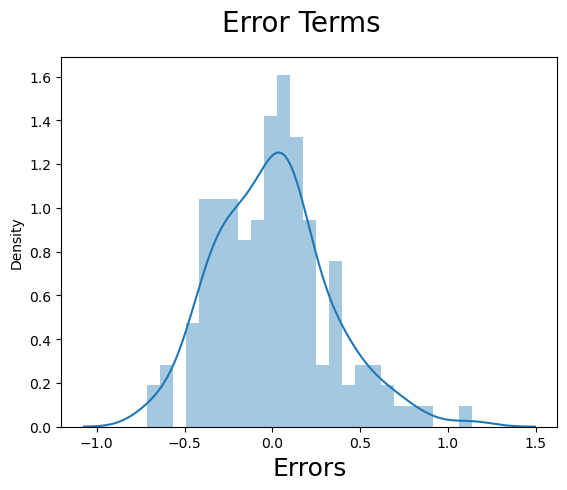

In [135]:
#Plot the histogram of error term
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 25)
fig.suptitle("Error Terms", fontsize=20)
plt.xlabel("Errors", fontsize=18)

## Predictions

In [137]:
df_test[var_list] = scaler.transform(df_test[var_list])

In [138]:
y_test = df_test.pop('price')
X_test = df_test

In [139]:
col2

Index(['carwidth', 'enginesize', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'car_company_bmw',
       'car_company_peugeot', 'car_company_renault', 'car_company_subaru'],
      dtype='object')

In [141]:
X_test_rfe2 = X_test[col2]

In [142]:
X_test_rfe2 = X_test_rfe2.drop(['enginetype_ohcf', 'car_company_peugeot', 'enginetype_l', 'car_company_subaru'], axis=1)

In [143]:
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 160 to 128
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                62 non-null     float64
 1   carwidth             62 non-null     float64
 2   enginesize           62 non-null     float64
 3   enginelocation_rear  62 non-null     bool   
 4   enginetype_rotor     62 non-null     bool   
 5   car_company_bmw      62 non-null     bool   
 6   car_company_renault  62 non-null     bool   
dtypes: bool(4), float64(3)
memory usage: 2.2 KB


In [145]:
X_test_rfe2.iloc[:, 3:] = X_test_rfe2.iloc[:, 3:].astype(int)

In [146]:
X_test_rfe2.head()

,const,carwidth,enginesize,enginelocation_rear,enginetype_rotor,car_company_bmw,car_company_renault
160,1.0,-0.652569,-0.660242,0,0,0,0
186,1.0,-0.154030,-0.390836,0,0,0,0
59,1.0,0.299187,-0.072447,0,0,0,0
165,1.0,-0.833856,-0.660242,0,0,0,0
140,1.0,-0.924500,-0.415328,0,0,0,0


In [148]:
#Making Prediction
y_pred = lm2.predict(X_test_rfe2)

Text(0.5, 0, 'y_pred')

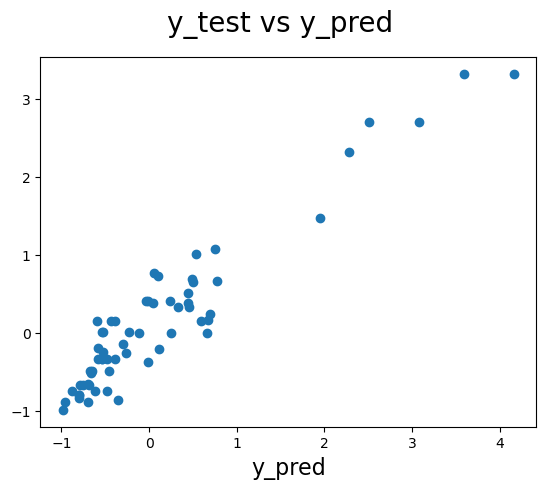

In [149]:
#Plot y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=16)
plt.xlabel('y_pred', fontsize=16)

In [151]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8997211435182686

In [152]:
col2 = col2.drop(['enginetype_ohcf', 'car_company_peugeot', 'enginetype_l', 'car_company_subaru'])

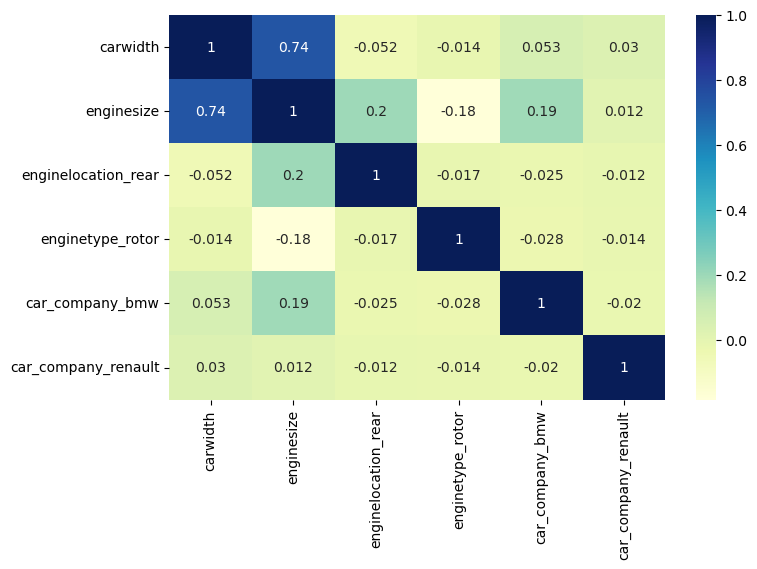

In [153]:
plt.figure(figsize=(8,5))
sns.heatmap(cars[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()